# INF-510, Claudio Torres, claudio.torres@usm.cl. DI-UTFSM
## Textbook: Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM, Philadelphia, 2000

# Differentiation by Interpolation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

sym.init_printing()

FS = 20
plt.rcParams.update({
    'font.size': FS,
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'xtick.labelsize': FS,
    'ytick.labelsize': FS,
    'axes.labelsize': FS,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

Defining symbolic variables

In [11]:
xj, h, x, h1, h2 = sym.symbols('xj h x h1 h2', reals=True)
u1, u2, u3, u4, u5 = sym.symbols('u1 u2 u3 u4 u5', reals=True)


## Do you remember Lagrange interpolation? Please do

In [4]:
# The little Lagrange polynomials
def l_Lagrange(X,x,i):
    l=1
    n=len(X)
    for k in np.arange(i):
        l*=(x-X[k])
    for k in np.arange(i+1,n):
        l*=(x-X[k])
    return l
# The Lagrange polynomials
def L_Lagrange(X,x,i):
    num = l_Lagrange(X,x,i)
    den = l_Lagrange(X,X[i],i)
    L=num/den
    return L
# The Lagrange interpolation
# X : x - data points
# x : the symbolic variable
# Y : y - data points
def P_Lagrange(X,x,Y):
    P=0
    n=len(X)
    for i in np.arange(n):
        P+=Y[i]*L_Lagrange(X,x,i)
    return P

## Just a small example of a interpolation of 2 points

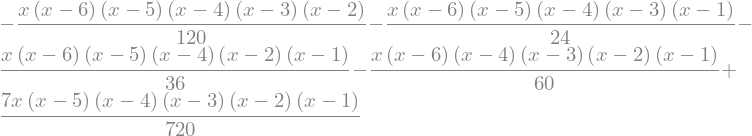

In [5]:
# x - data points
X=(0,1,2,3,4,5,6)
# y - data points
Y=(0,1,-2,1,0,2,7)
# The interpolation
P=P_Lagrange(X,x,Y)
# Just showing the polynomial. Do you see the Lagrange polynomials?
P

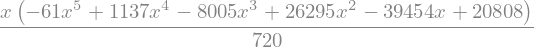

In [6]:
# And a simplified version of the polinomial!
sym.simplify(P)

Plotting what we got

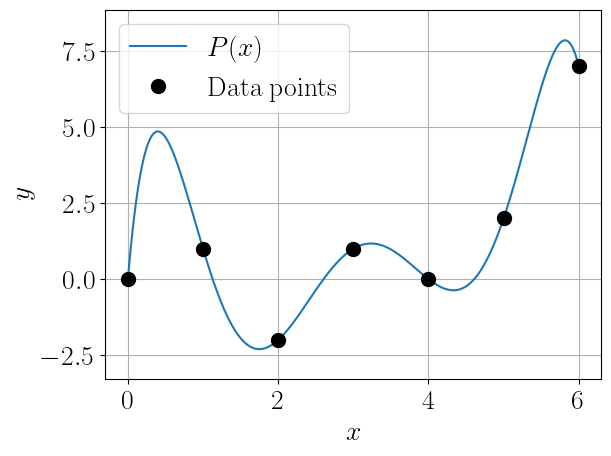

In [7]:
# We need to plot in a finer grid
xx=np.linspace(min(X),max(X),1000)
# Here we create a lambda function for our interpolation
Pl=sym.lambdify(x,P)
# The next line vectorize the lambda function, it is not need here but it can be used
# Plv=np.vectorize(Pl) 
plt.figure()
# Plotting the interpolated data
plt.plot(xx,Pl(xx),label='$P(x)$')
# Plotting the data points
plt.plot(np.array(X),np.array(Y),'k.',markersize=20,label=r'$\mathrm{Data\ points}$')
plt.grid(True)
plt.ylim([np.min(Pl(xx))-1,np.max(Pl(xx))+1])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.show()

## Second order finite difference for non equally spaced points

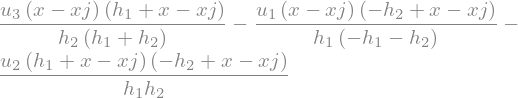

In [38]:
# x - data points. Notice that they are all symbolic variables!
X=(xj-h1,xj,xj+h2)
# y - data points. Also symbolic variables!
Y=(u1,u2,u3)
## In-class
#X=(xj-h,xj,xj+h)
#Y=(u1,u2,u3)
# The Lagrange interpolation still works!
P=P_Lagrange(X,x,Y)
P

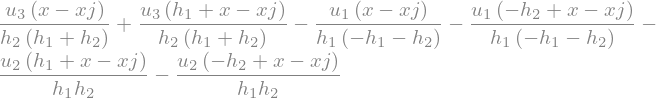

In [39]:
Pp=sym.diff(P,x)
Pp

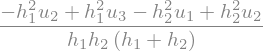

In [41]:
PpE=Pp.subs({x:xj})
PpE.simplify()

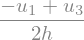

In [43]:
Pp.subs({x:xj})
PpE.subs({h1:h,h2:h}).simplify()

## Let's find the 4th order differentiation approximation

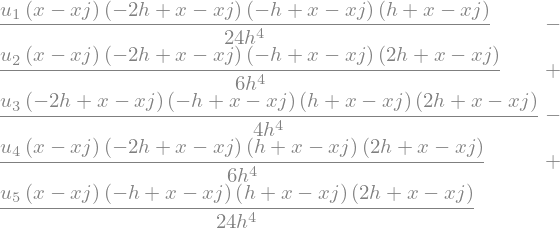

In [33]:
# x - data points. Notice that they are all symbolic variables!
X=(xj-2*h,xj-h,xj,xj+h,xj+2*h)
# y - data points. Also symbolic variables!
Y=(u1,u2,u3,u4,u5)
## In-class
#X=(xj-h,xj,xj+h)
#Y=(u1,u2,u3)
# The Lagrange interpolation still works!
P=P_Lagrange(X,x,Y)
P

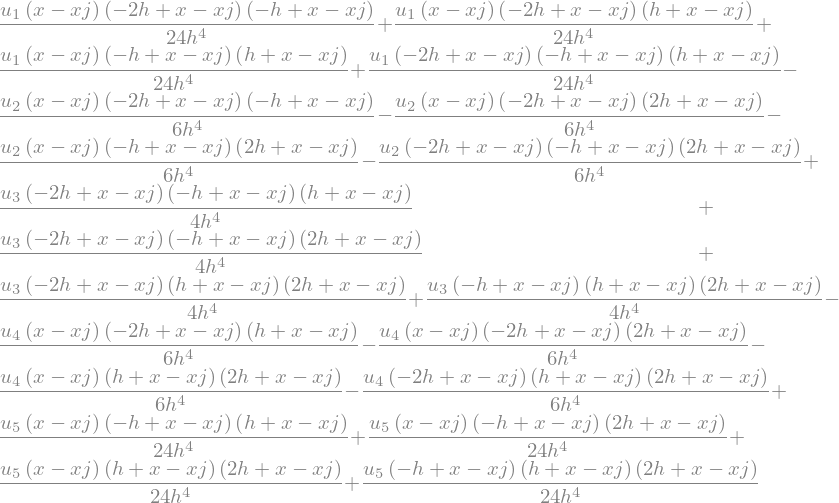

In [34]:
# Here we compute the derivative of the polynomian P(x), i.e. we obtain P'(x) and we definy it as Pp (P-prime).
Pp=sym.diff(P,x)
Pp

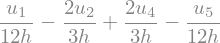

In [36]:
# Now we evaluate P'(x) at x=x_j.
PpE=Pp.subs({x:xj})
PpE

# Class work

## How to you find a 6th order approximation? Please do it

## How do you find a second order approximation on a left boundary? i.e. say you have $u_1(x_1)$, $u_2(x_2)$ and $u_3(x_3)$, interpolate them and compute the derivative at $x_1$.